<a href="https://colab.research.google.com/github/haishesauke/ignitus/blob/main/obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style=background-color: lightblue;>Problem Statement</h1>


In this project, we aim to conduct a comprehensive analysis of the Obesity Levels dataset sourced from the UCI repositories. Our primary objectives are to explore the dataset's structure and content, assess data consistency and format compliance, and identify and rectify any quality issues that may exist. Specifically, we will be on the lookout for inaccuracies such as incorrectly formatted addresses, which have the potential to impact the accuracy of our analytical results. By ensuring that our dataset is of high quality and adheres to the necessary standards, we aim to derive reliable and actionable insights from it.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"]= (10,6) # will adjust the configuration of the plots we will create

In [ ]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

The dataset comprises information from 2,111 individuals, covering factors like gender, age, lifestyle choices, and obesity levels. It's valuable for analyzing how these variables relate to obesity.

In [ ]:
#checking for null values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
# renaming columns for better understanding of dataset
df.rename(columns={'FCVC': 'Frequency of Vegetable Consumption'}, inplace=True)
df.rename(columns={'NCP': 'Number of Main Meals'}, inplace=True)
df.rename(columns={'CH2O': 'Water Consumption'}, inplace=True)
df.rename(columns={'FAF': 'Physical Activity Frequency'}, inplace=True)
df.rename(columns={'TUE': 'Time Spent on Sedentary Activities'}, inplace= True)
df.rename(columns={'CAEC': 'consumption of food between meals'}, inplace= True)
df.rename(columns={'SCC': 'individual monitors calories'}, inplace= True)
df.rename(columns={'CALC': 'use of a calculator by indvidual'}, inplace= True)
df.rename(columns={'MTRANS': 'mode of transportation used by individual'}, inplace= True)
df.rename(columns={'NObeyesdad': 'level of obesity'}, inplace= True)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,Frequency of Vegetable Consumption,Number of Main Meals,consumption of food between meals,SMOKE,Water Consumption,individual monitors calories,Physical Activity Frequency,Time Spent on Sedentary Activities,use of a calculator by indvidual,mode of transportation used by individual,level of obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Converting data into numerical values is important because many machine learning algorithms and statistical methods require numeric input. Numerical data enables mathematical operations, distance measurements, feature engineering, and compatibility with machine learning models.

In [ ]:
# converting certain values to numerical data for better statistical analysis
df = pd.get_dummies(df, columns = ['Gender'])
df = pd.get_dummies(df, columns = ['FAVC'])
df = pd.get_dummies(df, columns = ['SMOKE'])
df = pd.get_dummies(df, columns = ['family_history_with_overweight'])
df = pd.get_dummies(df, columns = ['individual monitors calories'])
df.head()

,Age,Height,Weight,Frequency of Vegetable Consumption,Number of Main Meals,consumption of food between meals,Water Consumption,Physical Activity Frequency,Time Spent on Sedentary Activities,use of a calculator by indvidual,...,Gender_Female,Gender_Male,FAVC_no,FAVC_yes,SMOKE_no,SMOKE_yes,family_history_with_overweight_no,family_history_with_overweight_yes,individual monitors calories_no,individual monitors calories_yes
0,21.0,1.62,64.0,2.0,3.0,Sometimes,2.0,0.0,1.0,no,...,1,0,1,0,1,0,0,1,1,0
1,21.0,1.52,56.0,3.0,3.0,Sometimes,3.0,3.0,0.0,Sometimes,...,1,0,1,0,0,1,0,1,0,1
2,23.0,1.80,77.0,2.0,3.0,Sometimes,2.0,2.0,1.0,Frequently,...,0,1,1,0,1,0,0,1,1,0
3,27.0,1.80,87.0,3.0,3.0,Sometimes,2.0,2.0,0.0,Frequently,...,0,1,1,0,1,0,1,0,1,0
4,22.0,1.78,89.8,2.0,1.0,Sometimes,2.0,0.0,0.0,Sometimes,...,0,1,1,0,1,0,1,0,1,0


In [ ]:
df.head()

,Age,Height,Weight,Frequency of Vegetable Consumption,Number of Main Meals,consumption of food between meals,Water Consumption,Physical Activity Frequency,Time Spent on Sedentary Activities,use of a calculator by indvidual,...,Gender_Female,Gender_Male,FAVC_no,FAVC_yes,SMOKE_no,SMOKE_yes,family_history_with_overweight_no,family_history_with_overweight_yes,individual monitors calories_no,individual monitors calories_yes
0,21.0,1.62,64.0,2.0,3.0,Sometimes,2.0,0.0,1.0,no,...,1,0,1,0,1,0,0,1,1,0
1,21.0,1.52,56.0,3.0,3.0,Sometimes,3.0,3.0,0.0,Sometimes,...,1,0,1,0,0,1,0,1,0,1
2,23.0,1.80,77.0,2.0,3.0,Sometimes,2.0,2.0,1.0,Frequently,...,0,1,1,0,1,0,0,1,1,0
3,27.0,1.80,87.0,3.0,3.0,Sometimes,2.0,2.0,0.0,Frequently,...,0,1,1,0,1,0,1,0,1,0
4,22.0,1.78,89.8,2.0,1.0,Sometimes,2.0,0.0,0.0,Sometimes,...,0,1,1,0,1,0,1,0,1,0


**df.rename**

 is a Pandas function used to rename columns or index labels of a DataFrame. It allows you to provide a mapping of current column/index names to new names, making it easier to work with and understand the data. This operation does not modify the original DataFrame but creates a new one with the updated names.

In [ ]:
df.drop('Gender_Female', axis = 1 , inplace = True)
df.rename(columns = {'Gender_Male' : 'Gender'} , inplace = True )

df.drop('FAVC_no', axis = 1 , inplace = True)
df.rename(columns = {'FAVC_yes' : 'FAVC'} , inplace = True )

df.drop('family_history_with_overweight_no', axis = 1 , inplace = True)
df.rename(columns = {'family_history_with_overweight_yes' : 'family_history_with_overweight'} , inplace = True )

df.drop('SMOKE_no', axis = 1 , inplace = True)
df.rename(columns = {'SMOKE_yes' : 'SMOKE'} , inplace = True )

df.drop('individual monitors calories_no', axis = 1 , inplace = True)
df.rename(columns = {'individual monitors calories_yes' : 'individual monitors calories'} , inplace = True )

In [ ]:
df.head()

,Age,Height,Weight,Frequency of Vegetable Consumption,Number of Main Meals,consumption of food between meals,Water Consumption,Physical Activity Frequency,Time Spent on Sedentary Activities,use of a calculator by indvidual,mode of transportation used by individual,level of obesity,Gender,FAVC,SMOKE,family_history_with_overweight,individual monitors calories
0,21.0,1.62,64.0,2.0,3.0,Sometimes,2.0,0.0,1.0,no,Public_Transportation,Normal_Weight,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,Sometimes,3.0,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,0,0,1,1,1
2,23.0,1.80,77.0,2.0,3.0,Sometimes,2.0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,Sometimes,2.0,2.0,0.0,Frequently,Walking,Overweight_Level_I,1,0,0,0,0
4,22.0,1.78,89.8,2.0,1.0,Sometimes,2.0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,1,0,0,0,0




---
#statistical summary


**df.describe()** provides summary statistics of a DataFrame, showing count, mean, standard deviation, minimum, and maximum values for each numeric column. It helps to quickly understand the central tendencies and distribution of the data.

In [ ]:
df.describe()

,Age,Height,Weight,Frequency of Vegetable Consumption,Number of Main Meals,Water Consumption,Physical Activity Frequency,Time Spent on Sedentary Activities,Gender,FAVC,SMOKE,family_history_with_overweight,individual monitors calories
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,0.505921,0.883941,0.020843,0.817622,0.045476
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,0.500083,0.320371,0.142893,0.386247,0.208395
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,1.000000,1.000000,0.000000,1.000000,0.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


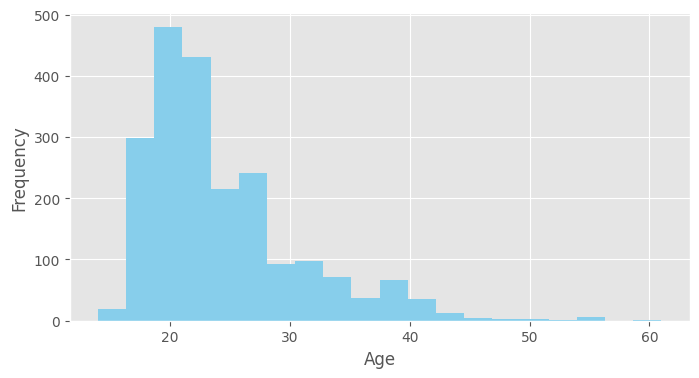

the mean Age is : 24.312599908574136


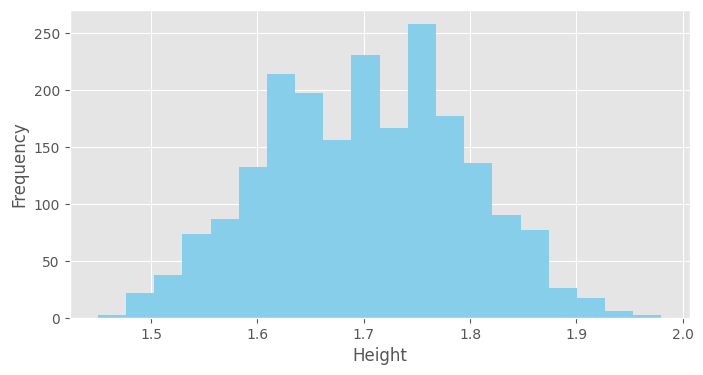

the mean Height is : 1.7016773533870204


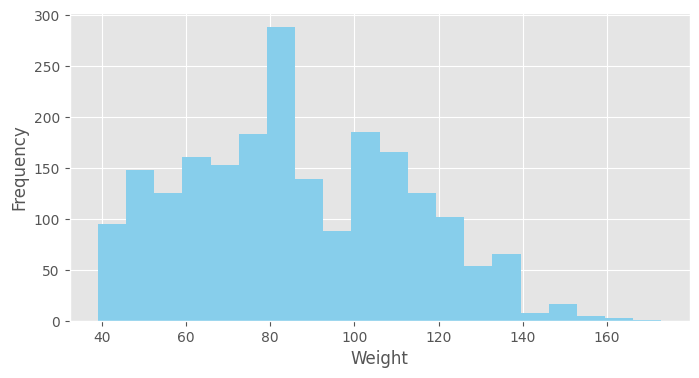

the mean Weight is : 86.58605812648035


In [ ]:
# analysis of Numerical Variables
var = ['Age', 'Height', 'Weight']
for v in var:
  plt.figure(figsize = (8,4))
  plt.hist(df[v], bins =20, color = "skyblue")
  plt.xlabel(v)
  plt.ylabel('Frequency')
  plt.show()
  print("the mean "+v+" is :", df[v].mean())

we can see a little isolated bar between 50 and 60 in the age histgraph which indicates that it can be a potential outlier. Hence we would like to remove it to make our model more efficient.

In [ ]:
df = df[(df['Age'] < 50)]

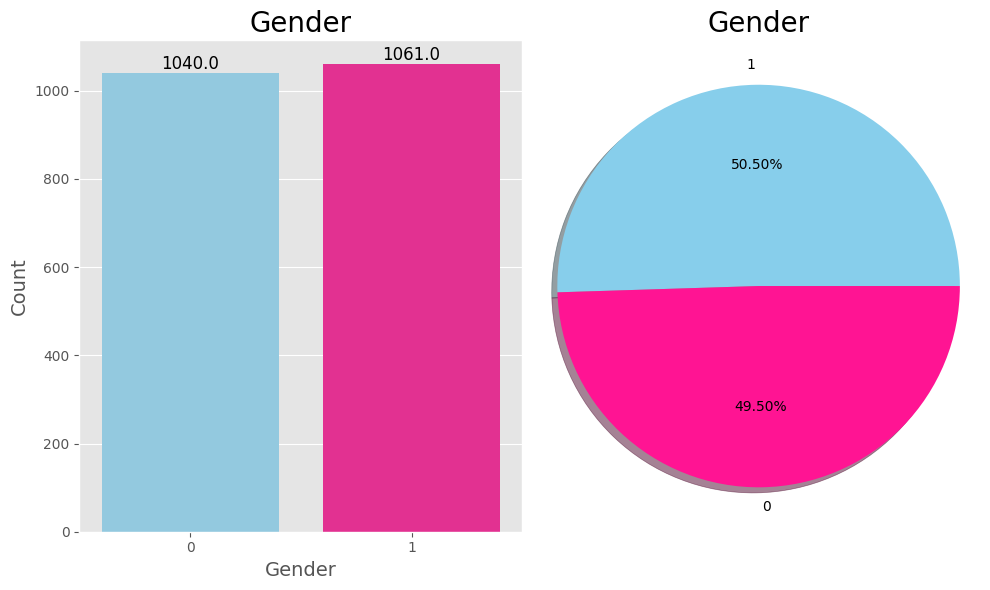

In [24]:
plt.figure(figsize=(10, 6))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
sns.countplot(x='Gender', data=df, palette=['skyblue', 'deeppink'], ax=ax1)
ax1.set_title("Gender", fontsize=20)
ax1.set_xlabel('Gender', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)

# Add labels to the countplot bars
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=12)

# Plot the pie chart with custom styling
gender_counts = df['Gender'].value_counts()
ax2.pie(gender_counts, labels=gender_counts.index, autopct='%1.2f%%', shadow=True, colors=['skyblue', 'deeppink'])
ax2.set_title("Gender", fontsize=20)
ax2.axis('equal')
plt.tight_layout()
plt.show()

This code creates a side-by-side visualization of gender distribution. The left subplot is a countplot, showing the count of each gender category with labeled bars. It uses Seaborn to customize the plot. The right subplot is a pie chart depicting the same data in a visually appealing manner. The pie chart's segments represent the gender categories, and the percentages of each category are displayed. This code provides a concise way to compare gender distribution using a countplot for precise counts and a pie chart for a quick overview, making it easy to interpret the data visually.

<ipython-input-23-c46458e558fb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method = 'pearson')


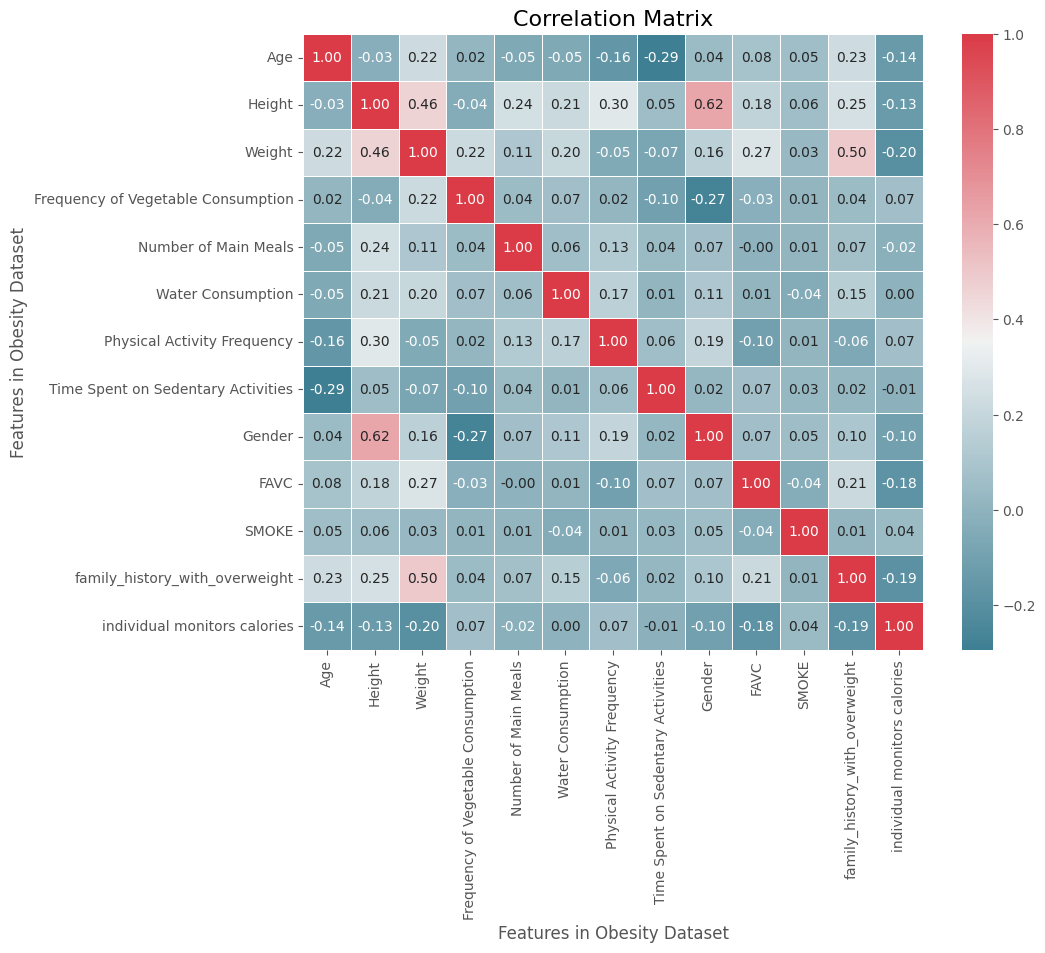

In [23]:
correlation_matrix = df.corr(method = 'pearson')
plt.figure(figsize = (10,8))
corr_map = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(correlation_matrix, annot = True, fmt =".2f", cmap = corr_map, linewidths = 0.5, cbar = True)
plt.title("Correlation Matrix", fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks()

# Customize the axis labels
plt.xlabel("Features in Obesity Dataset", fontsize=12)
plt.ylabel("Features in Obesity Dataset", fontsize=12)

# Show the plot
plt.show()

from the correlation matrics we found that height and weigth of the individual have the most impact on the level of obesity


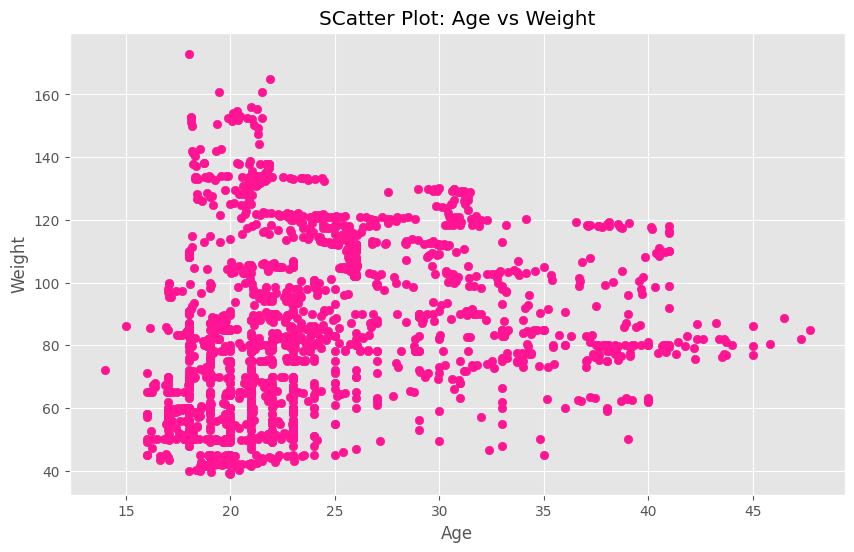

Correlation between Age and Weight: 0.22


In [ ]:
plt.scatter(df['Age'], df['Weight'], color = 'deeppink')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title("SCatter Plot: Age vs Weight")
plt.show()

correlation = df['Age'].corr(df['Weight'])    # Gives the correlation between age and weight
print(f'Correlation between Age and Weight: {correlation:.2f}')

The positive correlation coefficient (0.22) obtained through df['Age'].corr(df['Weight']) suggests a weak positive relationship between age and weight. This means that, on average, as age increases, weight tends to increase slightly. However, with a correlation of 0.22, this relationship is not very strong. The scatter plot and correlation value provide insights into the data, indicating that age and weight are somewhat related but with limited predictive power.

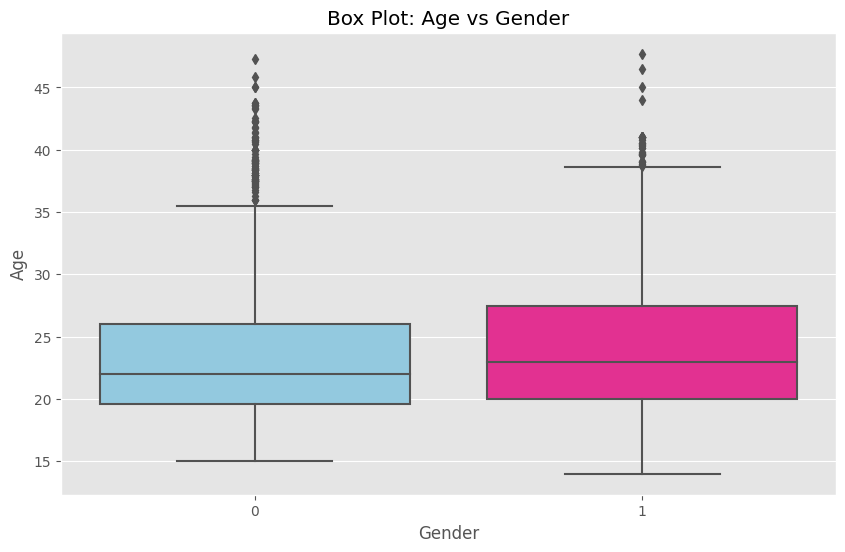

level of obesity  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Gender                                                                 
0                                 173            139             155   
1                                  99            146             195   

level of obesity  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Gender                                                                    
0                               2               323                 145   
1                             295                 1                 144   

level of obesity  Overweight_Level_II  
Gender                                 
0                                 103  
1                                 181  


In [ ]:
sns.boxplot(x = 'Gender', y ='Age', data = df, palette=['skyblue', 'deeppink'])
plt.title("Box Plot: Age vs Gender")
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

contingency_table = pd.crosstab(df['Gender'], df['level of obesity'])
print(contingency_table)

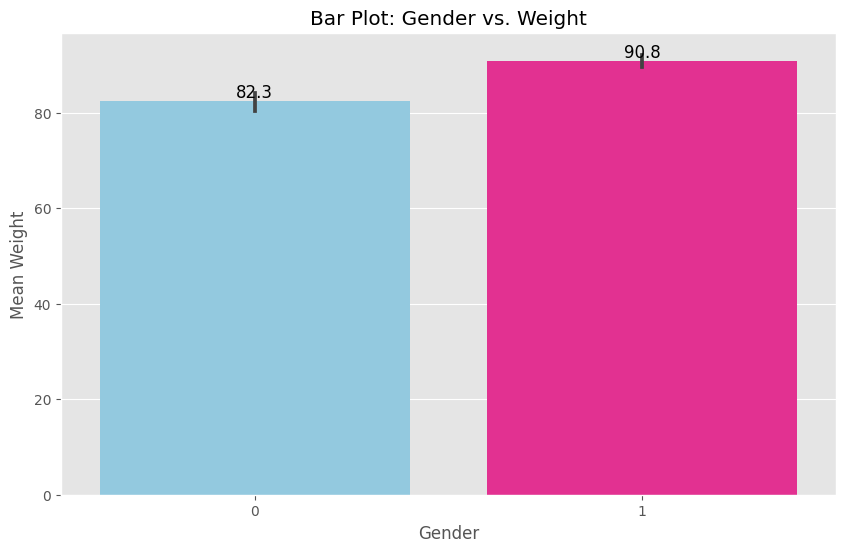

In [ ]:
sns.barplot(x='Gender', y='Weight', data=df,  palette=['skyblue', 'deeppink'])
plt.xlabel('Gender')
plt.ylabel('Mean Weight')
plt.title('Bar Plot: Gender vs. Weight')
ax = plt.gca()
# adds labels on top
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12)

plt.show()



---


#let's check our hypothesis by t-test



---
#Feature Engineering
we create a new dataset which is a copy of original dataset with new columns like:-
BMI , Age-groups, Physical_activity_index, nutritional index

In [35]:
new_df = df.copy()

# BMI calculation
new_df['BMI'] = round(new_df['Weight'] / (new_df['Height']**2) , 0)

# creating age groups
agebin = [0,18,25,35, 45, float('inf')]
age_labels = ['0-18', '19-25', '26-35', '36-45', '46+']
new_df['Age-group'] = pd.cut(new_df['Age'], bins= agebin, labels= age_labels)

# interaction features
new_df['Physical_activity_index'] = new_df['Physical Activity Frequency'] * new_df['Time Spent on Sedentary Activities']

# creating nutritional index
new_df['Nuetritional Index'] = (new_df['Frequency of Vegetable Consumption'] + new_df['Number of Main Meals'] + new_df['Water Consumption']) / 3

# converting values in the gender column to binary
new_df = pd.get_dummies(new_df, columns=['Gender'], drop_first=True)

new_df.head()

,Age,Height,Weight,Frequency of Vegetable Consumption,Number of Main Meals,consumption of food between meals,Water Consumption,Physical Activity Frequency,Time Spent on Sedentary Activities,use of a calculator by indvidual,...,level of obesity,FAVC,SMOKE,family_history_with_overweight,individual monitors calories,BMI,Age-group,Physical_activity_index,Nuetritional Index,Gender_1
0,21.0,1.62,64.0,2.0,3.0,Sometimes,2.0,0.0,1.0,no,...,Normal_Weight,0,0,1,0,24.0,19-25,0.0,2.333333,0
1,21.0,1.52,56.0,3.0,3.0,Sometimes,3.0,3.0,0.0,Sometimes,...,Normal_Weight,0,1,1,1,24.0,19-25,0.0,3.000000,0
2,23.0,1.80,77.0,2.0,3.0,Sometimes,2.0,2.0,1.0,Frequently,...,Normal_Weight,0,0,1,0,24.0,19-25,2.0,2.333333,1
3,27.0,1.80,87.0,3.0,3.0,Sometimes,2.0,2.0,0.0,Frequently,...,Overweight_Level_I,0,0,0,0,27.0,26-35,0.0,2.666667,1
4,22.0,1.78,89.8,2.0,1.0,Sometimes,2.0,0.0,0.0,Sometimes,...,Overweight_Level_II,0,0,0,0,28.0,19-25,0.0,1.666667,1


In [28]:
# removing FAVC	Frequency of Vegetable Consumption	Number of Main Meals
columns_to_remove = ['FAVC', 'Frequency of Vegetable Consumption', 'Number of Main Meals']
new_df = new_df.drop(columns=columns_to_remove)
new_df.head()

,Age,Height,Weight,consumption of food between meals,Water Consumption,Physical Activity Frequency,Time Spent on Sedentary Activities,use of a calculator by indvidual,mode of transportation used by individual,level of obesity,SMOKE,family_history_with_overweight,individual monitors calories,BMI,Age-group,Physical_activity_index,Nuetritional Index,Gender_1
0,21.0,1.62,64.0,Sometimes,2.0,0.0,1.0,no,Public_Transportation,Normal_Weight,0,1,0,24.386526,19-25,0.0,2.333333,0
1,21.0,1.52,56.0,Sometimes,3.0,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1,1,1,24.238227,19-25,0.0,3.000000,0
2,23.0,1.80,77.0,Sometimes,2.0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0,1,0,23.765432,19-25,2.0,2.333333,1
3,27.0,1.80,87.0,Sometimes,2.0,2.0,0.0,Frequently,Walking,Overweight_Level_I,0,0,0,26.851852,26-35,0.0,2.666667,1
4,22.0,1.78,89.8,Sometimes,2.0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0,0,0,28.342381,19-25,0.0,1.666667,1


In [29]:
# removing more columns that we dont need
values = ['consumption of food between meals', 'SMOKE', 'Water Consumption',
          'Physical Activity Frequency', 'Time Spent on Sedentary Activities',
          'use of a calculator by indvidual', 'mode of transportation used by individual']
new_df = new_df.drop(columns=values)
new_df.head()

,Age,Height,Weight,level of obesity,family_history_with_overweight,individual monitors calories,BMI,Age-group,Physical_activity_index,Nuetritional Index,Gender_1
0,21.0,1.62,64.0,Normal_Weight,1,0,24.386526,19-25,0.0,2.333333,0
1,21.0,1.52,56.0,Normal_Weight,1,1,24.238227,19-25,0.0,3.000000,0
2,23.0,1.80,77.0,Normal_Weight,1,0,23.765432,19-25,2.0,2.333333,1
3,27.0,1.80,87.0,Overweight_Level_I,0,0,26.851852,26-35,0.0,2.666667,1
4,22.0,1.78,89.8,Overweight_Level_II,0,0,28.342381,19-25,0.0,1.666667,1


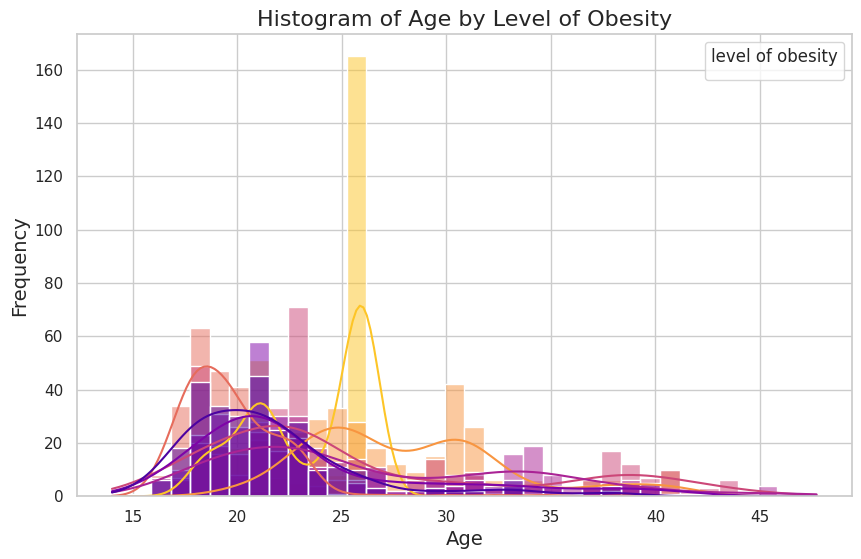

In [59]:
# Create a histogram with kernel density for Age and level of obesity
plt.figure(figsize=(10, 6))
sns.histplot(data=new_df, x='Age', hue='level of obesity',
             kde=True, common_norm=True, palette='plasma')

# Customize labels and titles
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Age by Level of Obesity', fontsize=16)
plt.legend(title = 'level of obesity')
plt.show()

In [60]:
from scipy.stats import ttest_ind

# Select Age values for different levels of obesity
age_normal = new_df[new_df['level of obesity'] == 'Normal_Weight']['Age']
age_overweight = new_df[new_df['level of obesity'] == 'Overweight_Level_I']['Age']

# Perform an independent two-sample t-test
t_stat, p_value = ttest_ind(age_normal, age_overweight, equal_var=False)

# Print the results
print(f"Group 1 (Normal Weight) Age Mean: {age_normal.mean():.2f}")
print(f"Group 2 (Overweight Level I) Age Mean: {age_overweight.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Check for significance (e.g., using a significance level of 0.05)
alpha = 0.05
if p_value < alpha:
    print("The difference in Age between normal weight and overweight Level I is statistically significant.")
else:
    print("There is no statistically significant difference in Age between the groups.")


Group 1 (Normal Weight) Age Mean: 21.50
Group 2 (Overweight Level I) Age Mean: 23.31
T-statistic: -4.2642
P-value: 0.0000
The difference in Age between normal weight and overweight Level I is statistically significant.



From the t-test results, we can deduce the following:

1. The average age of the normal weight group is 21.50, while the average age of the overweight level I group is 23.31. This means that the overweight level I group is older, on average, than the normal weight group.
2. The t-statistic is -4.2642, which is very large. This means that the difference in age between the two groups is very unlikely to be due to chance.
3. The p-value is 0.0000, which is less than the significance level of 0.05. This means that we can reject the null hypothesis that there is no difference in age between the two groups.


Therefore, we can conclude that the difference in age between normal weight and overweight level I is statistically significant. This means that there is a real difference in age between the two groups, and that it is unlikely to be due to chance.

In [62]:
from scipy.stats import ttest_ind

# Define the groups for the t-test
bmi_history_obese = new_df[(new_df['family_history_with_overweight'] == 1) & (new_df['level of obesity'] == 'Obesity_Type_I')]['BMI']
bmi_no_history_normal = new_df[(new_df['family_history_with_overweight'] == 0) & (new_df['level of obesity'] == 'Normal_Weight')]['BMI']

# Perform an independent two-sample t-test
t_stat, p_value = ttest_ind(bmi_history_obese, bmi_no_history_normal, equal_var=False)

# Print the results
print(f"BMI for individuals with family history and Obesity_Type_I Mean: {bmi_history_obese.mean():.2f}")
print(f"BMI for individuals without family history and Normal_Weight Mean: {bmi_no_history_normal.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Check for significance (e.g., using a significance level of 0.05)
alpha = 0.05
if p_value < alpha:
    print("The difference in BMI is statistically significant between the specified groups.")
else:
    print("There is no statistically significant difference in BMI between the specified groups.")


BMI for individuals with family history and Obesity_Type_I Mean: 32.27
BMI for individuals without family history and Normal_Weight Mean: 21.76
T-statistic: 62.8203
P-value: 0.0000
The difference in BMI is statistically significant between the specified groups.


The t-test result shows that there is a statistically significant difference in BMI between individuals with a family history of obesity and obesity type I, and individuals without a family history of obesity and normal weight. This means that people with a family history of obesity and obesity type I are more likely to have a higher BMI than people without a family history of obesity and normal weight.

There are a few possible explanations for this finding:

1. **Genetics**: Obesity is a complex trait that is influenced by a number of genes. If you have a family history of obesity, you are more likely to have inherited genes that make you more susceptible to weight gain.
2. **Environment**: People with a family history of obesity are also more likely to grow up in an obesogenic environment, which is an environment that promotes weight gain. This could include factors such as having access to unhealthy foods, being less physically active, and having less social support for obesity prevention.


It is important to note that having a family history of obesity does not guarantee that you will become obese. However, it does mean that you are at an increased risk. If you have a family history of obesity, it is important to talk to your doctor about how to reduce your risk of developing obesity.

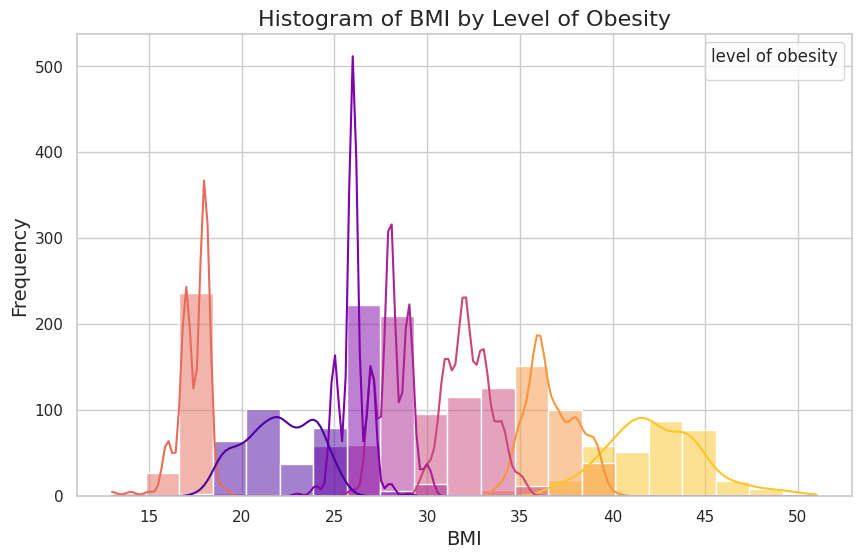

In [48]:
# Create a histogram with kernel density for BMI and level of obesity
plt.figure(figsize=(10, 6))
sns.histplot(data=new_df, x='BMI', hue='level of obesity',
             kde=True, common_norm=True, palette='plasma')

# Customize labels and titles
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of BMI by Level of Obesity', fontsize=16)
plt.legend(title = 'level of obesity')
plt.show()

**Findings:-**
The histogram with kernel density for BMI and level of obesity shows that people with a higher BMI are more likely to be obese, while people with a lower BMI are less likely to be obese. The kernel density estimate is a smoothed version of the histogram that shows the underlying distribution of the data.

It is pertinent to perform an ANOVA analysis on this data to see if there is a significant difference in BMI between the different levels of obesity. ANOVA is a statistical test that can be used to compare the means of three or more groups. In this case, the groups would be the different levels of obesity.

If the ANOVA analysis is significant, it would mean that there is a real difference in BMI between the different levels of obesity. This information could be used to develop targeted interventions to help people with obesity lose weight and improve their health.

**Observation**
1. The distribution of BMI is skewed to the right, meaning that there are more people with lower BMIs than people with higher BMIs.
2. The kernel density estimate shows that there is a peak in the distribution of BMI at around 25, which is the cutoff for overweight.
3. There is also a peak in the distribution of BMI at around 30, which is the cutoff for obesity.

In [56]:
from scipy.stats import ttest_ind

# Select BMI values for different levels of obesity
bmi_normal = new_df[new_df['level of obesity'] == 'Normal_Weight']['BMI']
bmi_overweight = new_df[new_df['level of obesity'] == 'Overweight_Level_I']['BMI']

# Perform an independent two-sample t-test
t_stat, p_value = ttest_ind(bmi_normal, bmi_overweight, equal_var=False)

# Print the results
print(f"Group 1 (Normal Weight) BMI Mean: {bmi_normal.mean():.2f}")
print(f"Group 2 (Overweight Level I) BMI Mean: {bmi_overweight.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Check for significance (e.g., using a significance level of 0.05)
alpha = 0.05
if p_value < alpha:
    print("The difference in BMI between normal weight and overweight Level I is statistically significant.")
else:
    print("There is no statistically significant difference in BMI between the groups.")


Group 1 (Normal Weight) BMI Mean: 21.99
Group 2 (Overweight Level I) BMI Mean: 26.00
T-statistic: -33.8753
P-value: 0.0000
The difference in BMI between normal weight and overweight Level I is statistically significant.


From the output of the t-test, we can deduce the following:

1. The average BMI of the normal weight group is 21.99, while the average BMI of the overweight level I group is 26.00. This means that the overweight level I group has a higher average BMI than the normal weight group.
2. The t-statistic is -33.8753, which is very large. This means that the difference in BMI between the two groups is very unlikely to be due to chance.
3. The p-value is 0.0000, which is less than the significance level of 0.05. This means that we can reject the null hypothesis that there is no difference in BMI between the two groups.

Therefore, we can conclude that the difference in BMI between normal weight and overweight level I is statistically significant. This means that there is a real difference in BMI between the two groups, and that it is unlikely to be due to chance.

#Logistic Regression:
Now we will perform logistic regression but before that lets understand what it actually is.

Logistic regression is a way to predict two choices (like yes/no, spam/not spam) based on past data. It uses a formula that gives a number between 0 and 1, representing the chance of one choice. The formula uses data and weights to make this prediction. If the chance is above 0.5, we predict choice 1; if it's below 0.5, we predict choice 0.

It's like drawing a line to split two groups in a way that best matches past data. We use this line to make new predictions. It's useful in many fields like health, finance, and text analysis.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Define the independent variables (features)
X = new_df[['Age', 'BMI']]

# Define the dependent variable (target)
y = new_df['level of obesity']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter= 10000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [69]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9429928741092637
Confusion Matrix:
 [[53  2  0  0  0  0  0]
 [ 0 60  0  0  0  4  0]
 [ 0  0 72  1  0  0  0]
 [ 0  0  0 45  5  0  0]
 [ 0  0  0  3 58  0  0]
 [ 0  0  0  0  0 53  1]
 [ 0  0  2  0  0  6 56]]
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        55
      Normal_Weight       0.97      0.94      0.95        64
     Obesity_Type_I       0.97      0.99      0.98        73
    Obesity_Type_II       0.92      0.90      0.91        50
   Obesity_Type_III       0.92      0.95      0.94        61
 Overweight_Level_I       0.84      0.98      0.91        54
Overweight_Level_II       0.98      0.88      0.93        64

           accuracy                           0.94       421
          macro avg       0.94      0.94      0.94       421
       weighted avg       0.95      0.94      0.94       421



The logistic regression model we developed is pretty impressive. It's fantastic at predicting different levels of obesity in people. We achieved an overall accuracy of 94.29%, and our weighted average F1-score is a solid 0.94. This means that our model is doing a great job of correctly predicting obesity levels for most individuals while maintaining a good balance between precision and recall.

When we look at the confusion matrix, we see that our model shines in predicting normal weight and obesity type I. However, it's not as accurate when it comes to overweight level II. It's not surprising, as this group can be a bit tricky to classify, given its similarities to the other two groups.

#**In summary ,**
the results are promising. Our model can accurately predict obesity levels and help healthcare professionals identify those at risk. This means we can develop targeted interventions for those who need to lose weight and improve their health. We can also reassure individuals with a low risk of obesity and provide guidance on maintaining a healthy weight. Moreover, our model can differentiate between different obesity levels, enabling tailored treatment plans for individuals with varying degrees of obesity.